In [1]:
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Activation
from tensorflow.keras.models import Sequential
from numpy import asarray
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

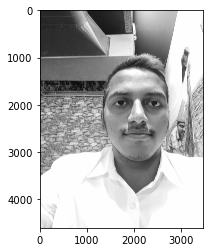

In [2]:
img = cv2.imread('ans.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

In [3]:
img.shape

(4608, 3456)

In [4]:
# scale_percent = 60 # percent of original size
# width = int(img.shape[1] * scale_percent / 100)
# height = int(img.shape[0] * scale_percent / 100)
width = 512
height = 512
dim = (width, height)
  
# resize image
resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

<function matplotlib.pyplot.show(close=None, block=None)>

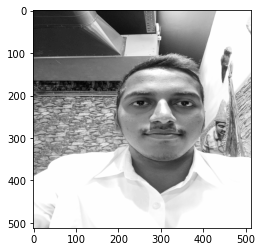

In [5]:
plt.imshow(resized, cmap='gray')
plt.show

In [6]:
resized.shape

(512, 512)

In [7]:
img_batch = resized.reshape(1, resized.shape[0], resized.shape[1], 1)
img_batch

array([[[[ 37],
         [ 33],
         [ 28],
         ...,
         [253],
         [251],
         [200]],

        [[ 37],
         [ 41],
         [ 36],
         ...,
         [253],
         [253],
         [245]],

        [[ 34],
         [ 38],
         [ 41],
         ...,
         [253],
         [253],
         [253]],

        ...,

        [[235],
         [235],
         [233],
         ...,
         [254],
         [254],
         [254]],

        [[235],
         [234],
         [231],
         ...,
         [254],
         [254],
         [254]],

        [[232],
         [231],
         [229],
         ...,
         [254],
         [254],
         [254]]]], dtype=uint8)

In [8]:
img_batch.shape

(1, 512, 512, 1)

In [9]:
model1 = Sequential()
model1.add(Convolution2D(10, (15,15), padding='valid', input_shape=(512,512,1)))
#there are 10 filters of size (15*15) with random weights intialization
#if padding is valid then there is no padding

model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 10)      2260      
Total params: 2,260
Trainable params: 2,260
Non-trainable params: 0
_________________________________________________________________


In [10]:
# formula for output is ((n+2p-f)/s) + 1
# n is input shape(512*512*1)
# p is padding(0 padding)
# f is filter size(15)
# s is stride(1)
((512+0-15)/1) + 1 # output matrix shape

498.0

In [13]:
# total trainable parameters is 
# each filter have one bias so total filters are 10 so there are 10 biases
(15*15*10)+10

# the 2260 parameters are trained during backpropogation process using gradient descent

2260

In [14]:
conv_img = model1.predict(img_batch)

In [15]:
conv_img.shape

(1, 498, 498, 10)

In [21]:
# lets visualize for 1 filter
model2 = Sequential()
model2.add(Convolution2D(1, (15,15), padding='valid', input_shape=(512,512,1)))
#there are 1 filters of size (15*15) with random weights intialization
#if padding is valid then there is no padding

model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 498, 498, 1)       226       
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


In [22]:
conv_img = model2.predict(img_batch)


In [23]:
conv_img.shape

(1, 498, 498, 1)

In [25]:
conv_img_show = conv_img.reshape(498, 498)
conv_img_show

array([[ 45.101006,  47.561287,  45.16382 , ..., 299.64703 , 299.57935 ,
        299.07968 ],
       [ 45.557163,  46.03468 ,  51.948742, ..., 300.27274 , 300.50217 ,
        299.90057 ],
       [ 53.921097,  51.199207,  56.883846, ..., 300.8617  , 300.6177  ,
        300.1646  ],
       ...,
       [269.6341  , 267.8237  , 264.90726 , ..., 299.39386 , 299.39386 ,
        299.39386 ],
       [268.98132 , 266.32022 , 264.12125 , ..., 299.39386 , 299.39386 ,
        299.39386 ],
       [266.90573 , 262.73187 , 260.31027 , ..., 299.39386 , 299.39386 ,
        299.39386 ]], dtype=float32)

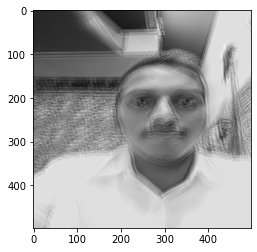

In [26]:
plt.imshow(conv_img_show, cmap='gray')
plt.show()

In [28]:
# now lets add relu layer
model3 = Sequential()
model3.add(Convolution2D(1, (15,15), padding='valid', input_shape=(512,512,1)))
model3.add(Activation('relu'))

# after doing convolution and adding bias then relu operation is done
# by doing relu the each output of convolution is did relu operation, so the shape after performing relu is same as convolution
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 498, 498, 1)       226       
_________________________________________________________________
activation (Activation)      (None, 498, 498, 1)       0         
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


In [29]:
conv_img = model3.predict(img_batch)
print(conv_img)
conv_img_show = conv_img.reshape(498, 498)
print(conv_img_show)

[[[[ 5.9095087]
   [16.066214 ]
   [13.320775 ]
   ...
   [93.40503  ]
   [93.68231  ]
   [97.049545 ]]

  [[ 6.717997 ]
   [ 8.408307 ]
   [ 9.315074 ]
   ...
   [93.562675 ]
   [93.28422  ]
   [93.88147  ]]

  [[12.884502 ]
   [ 4.5864744]
   [10.42156  ]
   ...
   [93.78662  ]
   [93.970505 ]
   [94.12477  ]]

  ...

  [[93.64779  ]
   [94.78008  ]
   [95.50293  ]
   ...
   [92.7399   ]
   [92.7399   ]
   [92.7399   ]]

  [[95.05887  ]
   [95.28154  ]
   [96.27606  ]
   ...
   [92.7399   ]
   [92.7399   ]
   [92.7399   ]]

  [[96.67318  ]
   [97.01226  ]
   [95.84271  ]
   ...
   [92.7399   ]
   [92.7399   ]
   [92.7399   ]]]]
[[ 5.9095087 16.066214  13.320775  ... 93.40503   93.68231   97.049545 ]
 [ 6.717997   8.408307   9.315074  ... 93.562675  93.28422   93.88147  ]
 [12.884502   4.5864744 10.42156   ... 93.78662   93.970505  94.12477  ]
 ...
 [93.64779   94.78008   95.50293   ... 92.7399    92.7399    92.7399   ]
 [95.05887   95.28154   96.27606   ... 92.7399    92.7399    92.7

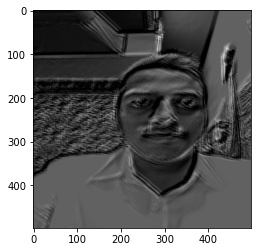

In [30]:
plt.imshow(conv_img_show, cmap='gray')
plt.show()

In [31]:
model4 = Sequential()
model4.add(Convolution2D(1, (15,15), padding='valid', input_shape=(512,512,1)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 498, 498, 1)       226       
_________________________________________________________________
activation_1 (Activation)    (None, 498, 498, 1)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 249, 1)       0         
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


In [32]:
# after performing relu activation the output is same as convolution(498,498,1)
# pooling only reduce the size of the image obtained after activation
(498+0-2)/2 + 1

249.0

In [34]:
conv_img = model4.predict(img_batch)
print(conv_img.shape)
conv_img_show = conv_img.reshape(249, 249)
print(conv_img_show.shape)

(1, 249, 249, 1)
(249, 249)


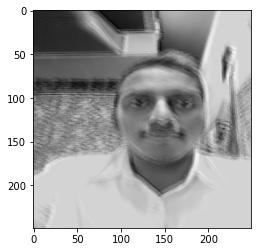

In [35]:
plt.imshow(conv_img_show, cmap='gray')
plt.show()